In [1]:
import re
import pandas as pd
import numpy as np
from collections import Counter

#plotting
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split , StratifiedKFold, cross_val_score


# Models
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


#NLP
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer 
from sklearn.feature_extraction.text import TfidfVectorizer

# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Read Data

In [2]:
data=pd.read_csv("messages.csv")
data.drop("message",inplace=True,axis=1)
print(data.shape)

(2893, 2)


# Data Insights

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2893 entries, 0 to 2892
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   subject  2831 non-null   object
 1   label    2893 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 45.3+ KB


In [4]:
data.shape

(2893, 2)

In [5]:
# Null Values
data.isnull().sum()

subject    62
label       0
dtype: int64

In [6]:
data.dropna(inplace=True)

In [7]:
data.isnull().sum()

subject    0
label      0
dtype: int64

In [8]:
# Duplicate dropping
data.drop_duplicates()

,subject,label
0,job posting - apple-iss research center,0
2,query : letter frequencies for text identifica...,0
3,risk,0
4,request book information,0
5,call for abstracts : optimality in syntactic t...,0
...,...,...
2887,win $ 300usd and a cruise !,1
2888,love your profile - ysuolvpv,1
2889,you have been asked to join kiddin,1
2890,anglicization of composers ' names,0


Text(0.5, 1.0, 'class distribution')

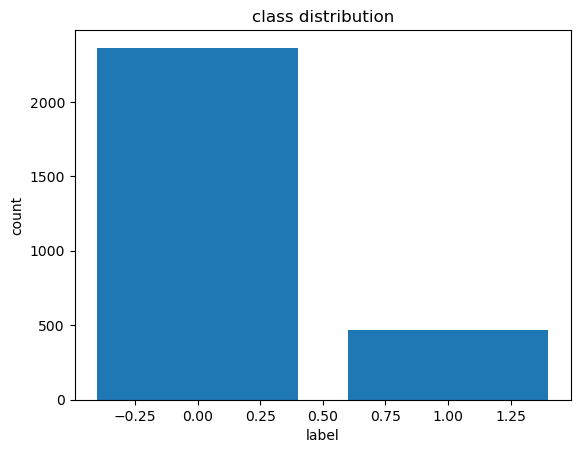

In [9]:
# TargetCount plot
label_counts=data["label"].value_counts()
plt.bar(label_counts.index,label_counts.values)
plt.xlabel("label")
plt.ylabel("count")
plt.title("class distribution")

# Feature Engineering

In [10]:
#Cleaning Links:
x = data["subject"]
x_clnd_link = [re.sub(r"http\S+", "", text) for text in x]
print(x_clnd_link[0])

job posting - apple-iss research center


In [11]:
pattern = "[^a-zA-Z0-9]"
# This means replace all the chars that follow the pattern 
x_cleaned = [re.sub(pattern," ",text) for text in x_clnd_link]
print(x_cleaned[0])

job posting   apple iss research center


In [12]:
#lowercase text: 
x_lowered = [text.lower() for text in x_cleaned]
print(x_lowered[0])

job posting   apple iss research center


In [13]:
#Tokenization:
x_tokenized = [nltk.word_tokenize(text) for text in x_lowered]
print(x_tokenized[0])

['job', 'posting', 'apple', 'iss', 'research', 'center']


In [14]:
#Lemmatizing and Removing Stopwords:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gopim\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [15]:
x_lemmatized = [[lemma.lemmatize(word) for word in text] for text in x_tokenized]
print(x_lemmatized[0])

['job', 'posting', 'apple', 'i', 'research', 'center']


In [16]:
#remove stopwords:
stopwords = nltk.corpus.stopwords.words("english")
x_prepared = [[word for word in text if word not in stopwords] for text in x_lemmatized]

print(x_prepared[0])

['job', 'posting', 'apple', 'research', 'center']


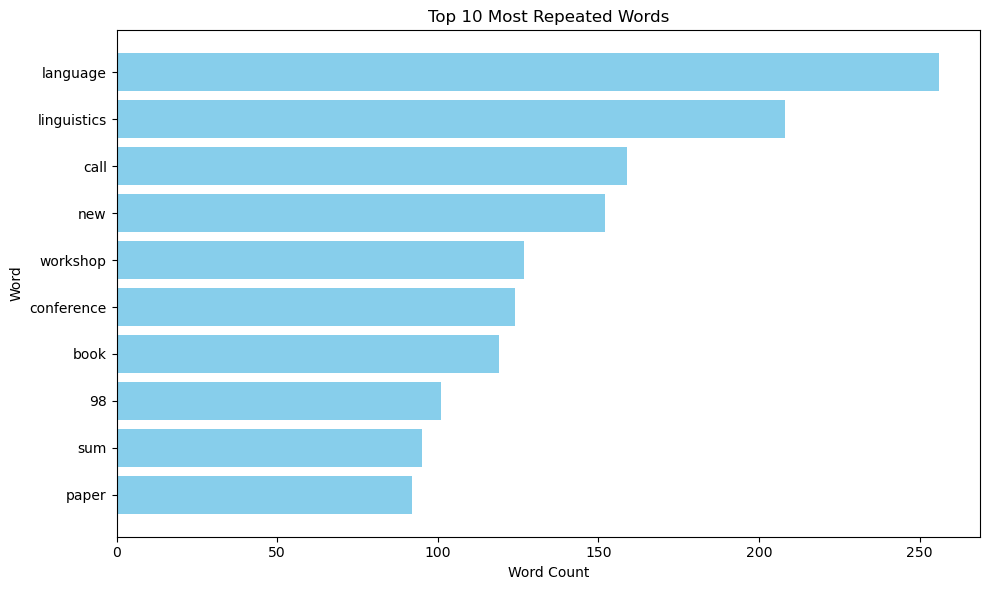

In [17]:
def visualize_most_repeated_words(text_entries):
    combined_text = ' '.join([' '.join(entry) for entry in text_entries])
    words = re.findall(r'\w+', combined_text.lower())
    word_counts = Counter(words)
    most_common_words = word_counts.most_common(10)
    most_common_words.reverse()
    words = [word for word, count in most_common_words]
    counts = [count for word, count in most_common_words]

    plt.figure(figsize=(10, 6))
    plt.barh(words, counts, color='skyblue')
    plt.xlabel('Word Count')
    plt.ylabel('Word')
    plt.title('Top 10 Most Repeated Words')
    plt.tight_layout()
    plt.show()
    

visualize_most_repeated_words(x_prepared)

In [18]:
#how many unique words we have in our dataset
len(np.unique([word for text in x_prepared for word in text]))

3078

In [19]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# # Bag-of-Words (BoW) representation
# vectorizer_bow = CountVectorizer()
# bow_matrix = vectorizer_bow.fit_transform(data['subject'])

# # TF-IDF representation
# vectorizer_tfidf = TfidfVectorizer()
# tfidf_matrix = vectorizer_tfidf.fit_transform(data['subject'])

vectorizer = CountVectorizer(max_features=20000)
x = vectorizer.fit_transform([" ".join(text) for text in x_prepared]).toarray()
x.shape

(2831, 3051)

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,np.asarray(data["label"]),random_state=42,test_size=0.2)


# Model

In [21]:
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import recall_score

In [22]:
# Report of train and test data
def classification_metrics(estimator, X_train, X_test, y_train, y_test):
    
    print("\ntraining evaluation metrics:")

    y_pred_train = estimator.predict(X_train)

    ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
    plt.show()

    print(classification_report(y_train, y_pred_train))



    print("\ntest evaluation metrics:")

    y_pred_test = estimator.predict(X_test)

    ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
    plt.show()

    print(classification_report(y_test, y_pred_test))

## Random Forrest


training evaluation metrics:


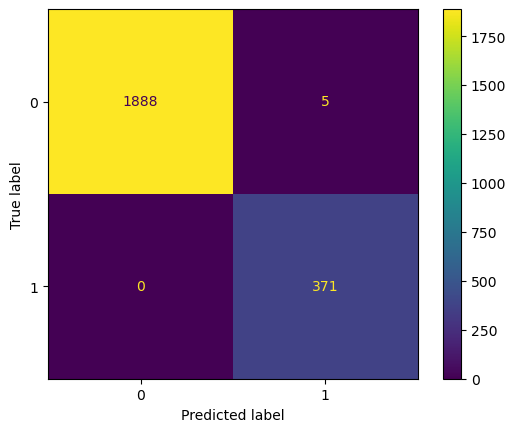

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1893
           1       0.99      1.00      0.99       371

    accuracy                           1.00      2264
   macro avg       0.99      1.00      1.00      2264
weighted avg       1.00      1.00      1.00      2264


test evaluation metrics:


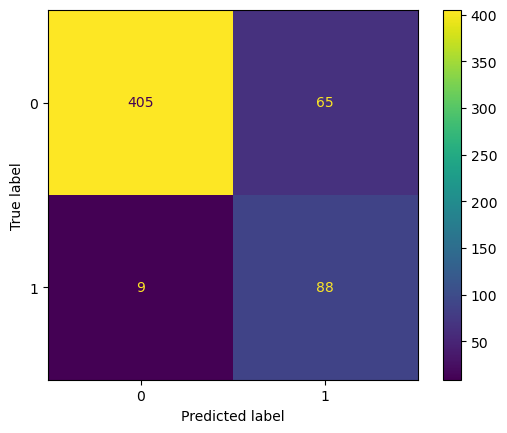

              precision    recall  f1-score   support

           0       0.98      0.86      0.92       470
           1       0.58      0.91      0.70        97

    accuracy                           0.87       567
   macro avg       0.78      0.88      0.81       567
weighted avg       0.91      0.87      0.88       567



In [23]:
rf = RandomForestClassifier()
model_rf = rf.fit(x_train, y_train)
classification_metrics(model_rf, x_train, x_test, y_train, y_test)

## Decision Tree


training evaluation metrics:


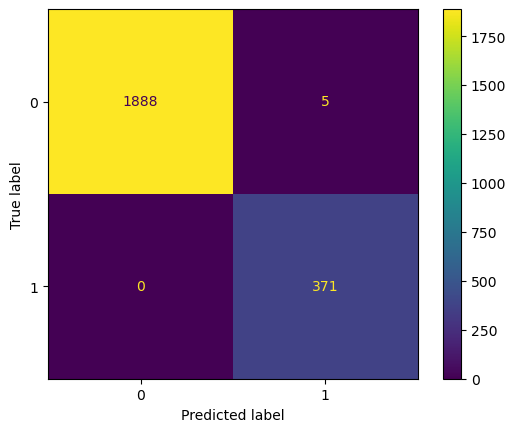

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1893
           1       0.99      1.00      0.99       371

    accuracy                           1.00      2264
   macro avg       0.99      1.00      1.00      2264
weighted avg       1.00      1.00      1.00      2264


test evaluation metrics:


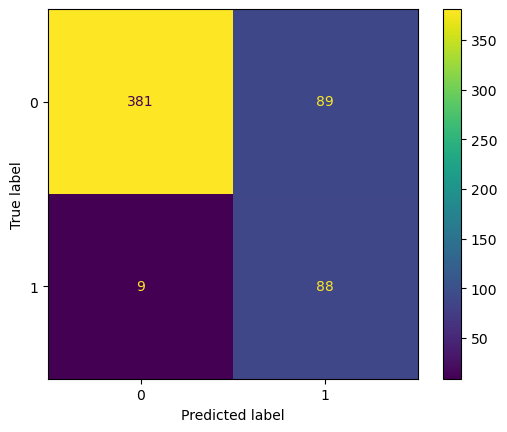

              precision    recall  f1-score   support

           0       0.98      0.81      0.89       470
           1       0.50      0.91      0.64        97

    accuracy                           0.83       567
   macro avg       0.74      0.86      0.76       567
weighted avg       0.89      0.83      0.84       567



In [24]:
dt = DecisionTreeClassifier()
model_dt = dt.fit(x_train, y_train)
classification_metrics(model_dt, x_train, x_test, y_train, y_test)

## Cross Validation

In [25]:
kfold = StratifiedKFold(n_splits = 10)
recalls = []
recall_dt_folds = cross_val_score(dt, x_train, y_train, cv = kfold, scoring='recall')
recall_dt_cross = np.mean(recall_dt_folds)

recalls.append(round(recall_dt_cross*100, 2))

print('Recall on each fold:\n', list(map(lambda value: round(value, 3), recall_dt_folds)))
print('Mean Recall on cross-validation:\n', round(recall_dt_cross*100, 2),'%')

Recall on each fold:
 [0.973, 0.865, 0.838, 0.921, 0.946, 0.892, 0.919, 0.973, 0.865, 0.784]
Mean Recall on cross-validation:
 89.75 %


## Logistic Regression


training evaluation metrics:


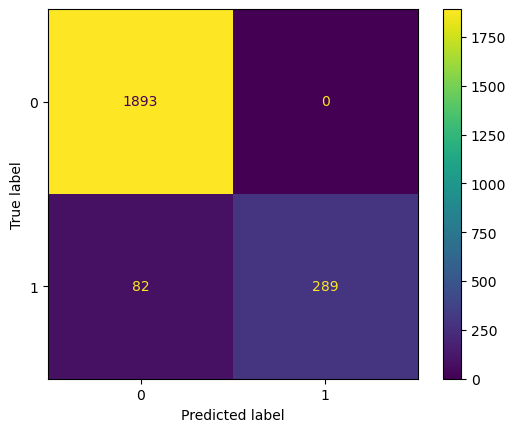

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1893
           1       1.00      0.78      0.88       371

    accuracy                           0.96      2264
   macro avg       0.98      0.89      0.93      2264
weighted avg       0.97      0.96      0.96      2264


test evaluation metrics:


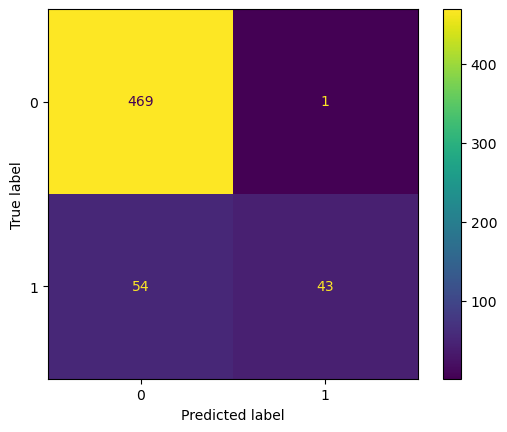

              precision    recall  f1-score   support

           0       0.90      1.00      0.94       470
           1       0.98      0.44      0.61        97

    accuracy                           0.90       567
   macro avg       0.94      0.72      0.78       567
weighted avg       0.91      0.90      0.89       567



In [26]:
lr = LogisticRegression()
model_lr = lr.fit(x_train, y_train)
classification_metrics(model_lr, x_train, x_test, y_train, y_test)

## SVC


training evaluation metrics:


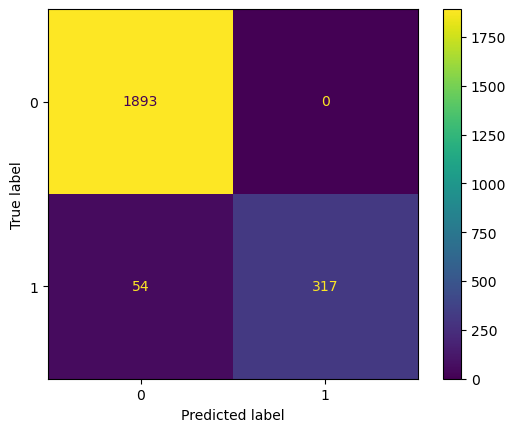

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1893
           1       1.00      0.85      0.92       371

    accuracy                           0.98      2264
   macro avg       0.99      0.93      0.95      2264
weighted avg       0.98      0.98      0.98      2264


test evaluation metrics:


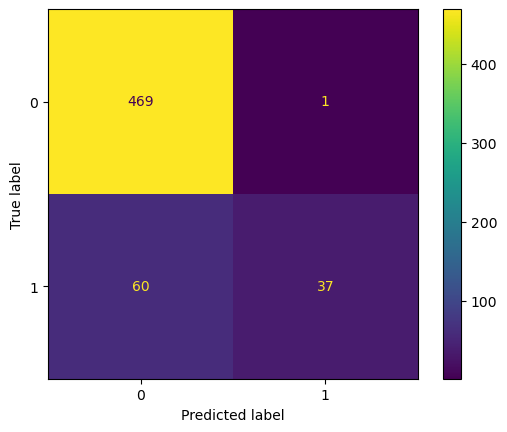

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       470
           1       0.97      0.38      0.55        97

    accuracy                           0.89       567
   macro avg       0.93      0.69      0.74       567
weighted avg       0.90      0.89      0.87       567



In [27]:
sv = SVC()
model_sv = sv.fit(x_train, y_train)
classification_metrics(model_sv, x_train, x_test, y_train, y_test)

## Gaussian


training evaluation metrics:


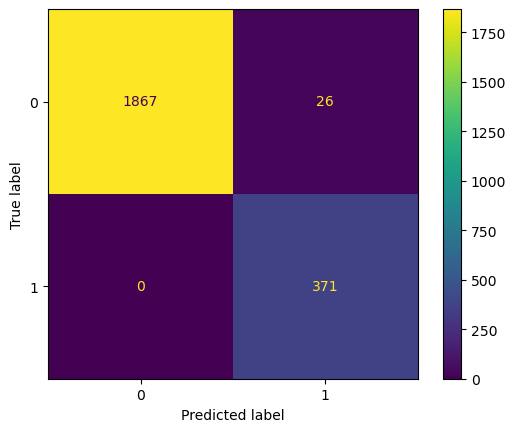

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1893
           1       0.93      1.00      0.97       371

    accuracy                           0.99      2264
   macro avg       0.97      0.99      0.98      2264
weighted avg       0.99      0.99      0.99      2264


test evaluation metrics:


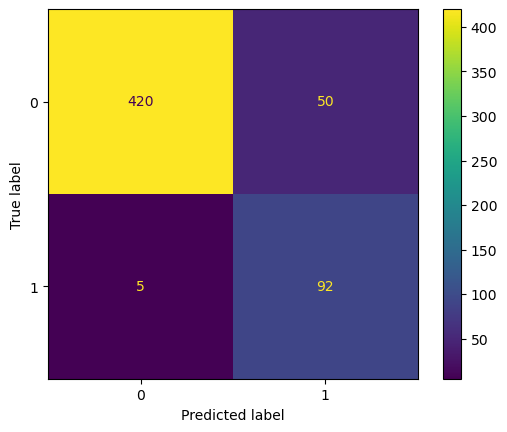

              precision    recall  f1-score   support

           0       0.99      0.89      0.94       470
           1       0.65      0.95      0.77        97

    accuracy                           0.90       567
   macro avg       0.82      0.92      0.85       567
weighted avg       0.93      0.90      0.91       567



In [28]:
gb = GaussianNB()
model_gb = gb.fit(x_train , y_train)
classification_metrics(model_gb, x_train, x_test, y_train, y_test)